In [ ]:
import sys
sys.path.append('..')

from playground_swing_rl.env.playground_swing import PlaygroundSwingEnv
from gymnasium.wrappers import TimeLimit
import numpy as np
import pandas as pd

from os import path
from math import sin, cos

In [ ]:
metadata = {
    "render_modes": ["human", "rgb_array"],
    "render_fps": 25,
}

L = 1.81
# mass of swinger
m1 = 31.3
m2 = 12.3
m3 = 6.4
M = m1 + m2 + m3
# height of swinger
l1 = 0.792
l2 = 0.393
l3 = 0.395
# position of swinger on sit
a = (m2/2 + m3)*l2/M
b = (m1 + m2/2)*l2/M

render_mode = 'human'
screen_dim = 500
screen = None
clock = None
isopen = True

env = PlaygroundSwingEnv()
state = env.reset()[0]
last_u = None # env.action_space.sample() 

if screen is None:
    pygame.init()
    if render_mode == "human":
        pygame.display.init()
        screen = pygame.display.set_mode((screen_dim, screen_dim))
    else:  # mode in "rgb_array"
        screen = pygame.Surface((screen_dim, screen_dim))

pygame.display.set_caption("Hello Pygame")

if clock is None:
    clock = pygame.time.Clock()

surf = pygame.Surface((screen_dim, screen_dim))
surf.fill((255, 255, 255))
bound = 3
scale = screen_dim / (bound * 2)
offset = screen_dim // 2

theta = state[0]
phi = state[2]
psi = state[4]


sit_a = a * scale
sit_b = b * scale
chain_width = 0.05*scale
chain_length = L * scale
torso_length = l1 * scale
legs_length = l3 * scale
chain_coords = [(0, -chain_width/2), (0, chain_width/2), (chain_length, chain_width/2), (chain_length, -chain_width/2)]
sit_coords = [(chain_length-chain_width/2, -sit_a), (chain_length+chain_width/2, -sit_a), (chain_length+chain_width/2, sit_b),(chain_length-chain_width/2, sit_b)]
torso_coords = [(chain_length, -sit_a+chain_width/2),(chain_length, -sit_a-chain_width/2),
                (chain_length-torso_length, -sit_a-chain_width/2), (chain_length-torso_length, -sit_a+chain_width/2)]
legs_coords = [(chain_length, sit_b+chain_width/2), (chain_length, sit_b-chain_width/2),
               (chain_length+legs_length, sit_b-chain_width/2), (chain_length+legs_length, sit_b+chain_width/2)]


# position of head
# p3 = p1 + l1*np.array((-sin(theta+phi), cos(theta+phi)))
# position of feet
# p4 = p2 + l3*np.array((sin(theta+psi), -cos(theta+psi)))

print(np.rad2deg(theta))

transformed_chain_coords = []
transformed_sit_coords = []
transformed_torso_coords = []
transformed_legs_coords = []
for c, d, e, f in zip(chain_coords, sit_coords, torso_coords, legs_coords):
    c = pygame.math.Vector2(c) #.rotate_rad(theta + np.pi/2 * 3)
    d = pygame.math.Vector2(d) #.rotate_rad(theta + np.pi/2 * 3)
    e = pygame.math.Vector2(e) #.rotate_rad(theta + np.pi/2 * 3)
    f = (pygame.math.Vector2(f)-pygame.math.Vector2((chain_length+offset,sit_b))).rotate_rad(psi) #.rotate_rad(theta + np.pi/2 * 3)
    c = (c[0] + offset, c[1] + offset)
    d = (d[0] + offset, d[1] + offset)
    e = (e[0] + offset, e[1] + offset)
    f = (f[0] + offset, f[1] + offset)
    transformed_chain_coords.append(c)
    transformed_sit_coords.append(d)
    transformed_torso_coords.append(e)
    transformed_legs_coords.append(f)

# draw chain
gfxdraw.aapolygon(surf, transformed_chain_coords, (204, 77, 77))
# draw sit
gfxdraw.aapolygon(surf, transformed_sit_coords, (204, 77, 77))
gfxdraw.filled_polygon(surf, transformed_sit_coords, (204, 77, 77))
# draw legs
gfxdraw.aapolygon(surf, transformed_legs_coords, (204, 77, 77))
gfxdraw.filled_polygon(surf, transformed_legs_coords, (204, 77, 77))
gfxdraw.aacircle(surf, 
                 int(transformed_sit_coords[2][0]-chain_width/2),
                 int(transformed_sit_coords[2][1]),
                 int(0.05 * scale), (0,0,0))
gfxdraw.filled_circle(surf, 
                 int(transformed_sit_coords[2][0]-chain_width/2),
                 int(transformed_sit_coords[2][1]),
                 int(0.05 * scale), (0,0,0))
# draw torso
gfxdraw.aapolygon(surf, transformed_torso_coords, (204, 77, 77))
gfxdraw.filled_polygon(surf, transformed_torso_coords, (204, 77, 77))

gfxdraw.aacircle(surf, 
                 int(transformed_sit_coords[0][0]+chain_width/2),
                 int(transformed_sit_coords[0][1]),
                 int(0.05 * scale), (0,0,0))
gfxdraw.filled_circle(surf, 
                 int(transformed_sit_coords[0][0]+chain_width/2),
                 int(transformed_sit_coords[0][1]),
                 int(0.05 * scale), (0,0,0))

# gfxdraw.filled_polygon(surf, transformed_chain_coords, (204, 77, 77))

rod_end = (chain_length, 0)
rod_end = pygame.math.Vector2(rod_end).rotate_rad(state[0] + np.pi / 2)
rod_end = (int(rod_end[0] + offset), int(rod_end[1] + offset))

gfxdraw.aacircle(surf, rod_end[0], rod_end[1], int(chain_width / 2), (204, 77, 77))
gfxdraw.filled_circle(surf, rod_end[0], rod_end[1], int(chain_width / 2), (204, 77, 77))

# drawing axle
gfxdraw.aacircle(surf, offset, offset, int(0.05 * scale), (0, 0, 0))
gfxdraw.filled_circle(surf, offset, offset, int(0.05 * scale), (0, 0, 0))
surf = pygame.transform.flip(surf, False, True)
screen.blit(surf, (0, 0))
if render_mode == "human":
    pygame.event.pump()
    clock.tick(metadata["render_fps"])
    pygame.display.flip()
# else:  # mode == "rgb_array":
#     return np.transpose(np.array(pygame.surfarray.pixels3d(screen)), axes=(1, 0, 2))

# Game loop
running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

# Quit Pygame
pygame.quit()

25.63644


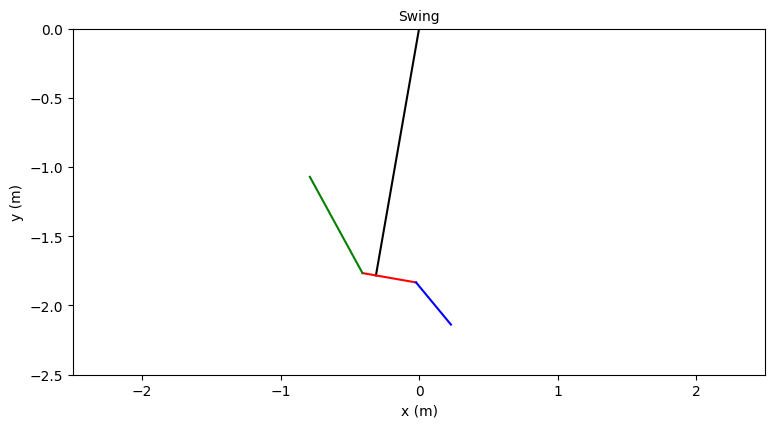

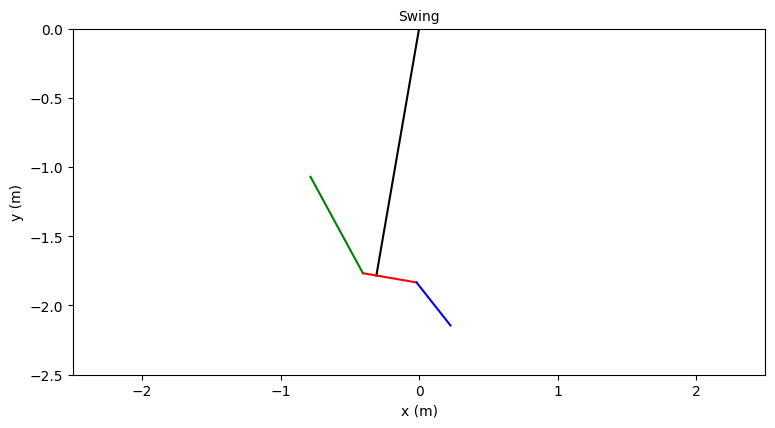

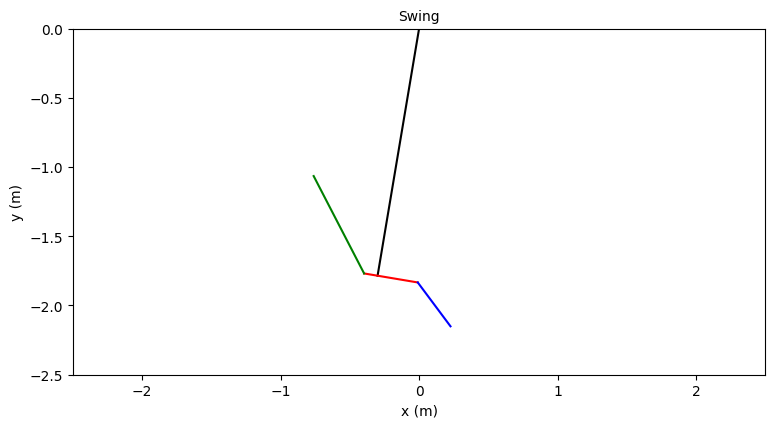

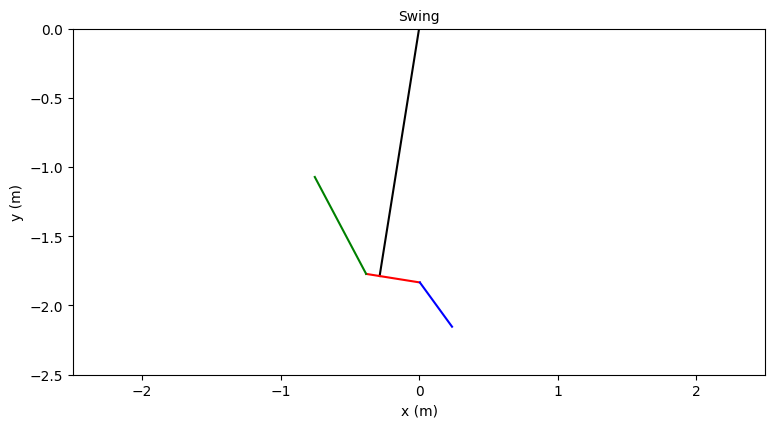

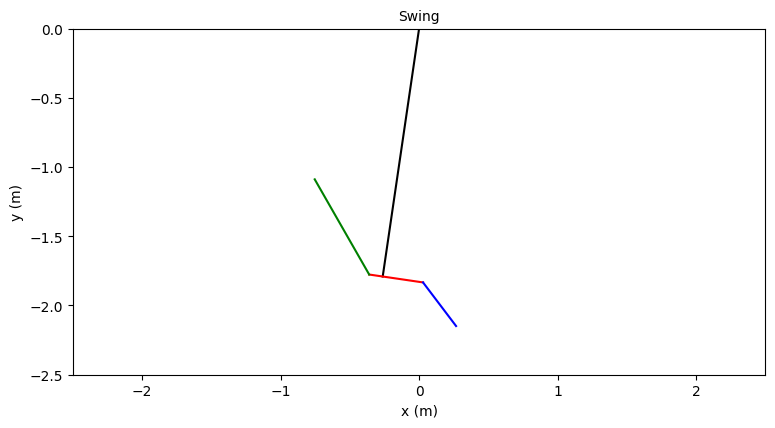

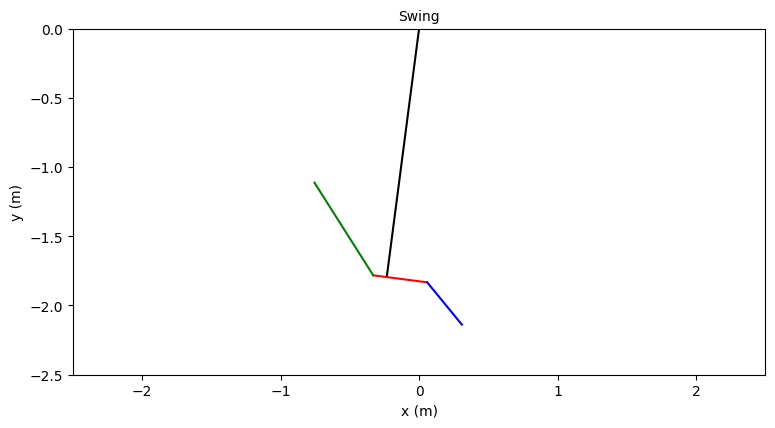

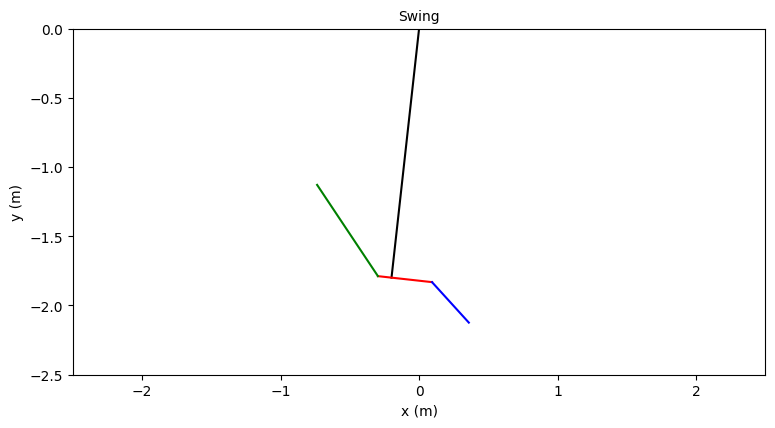

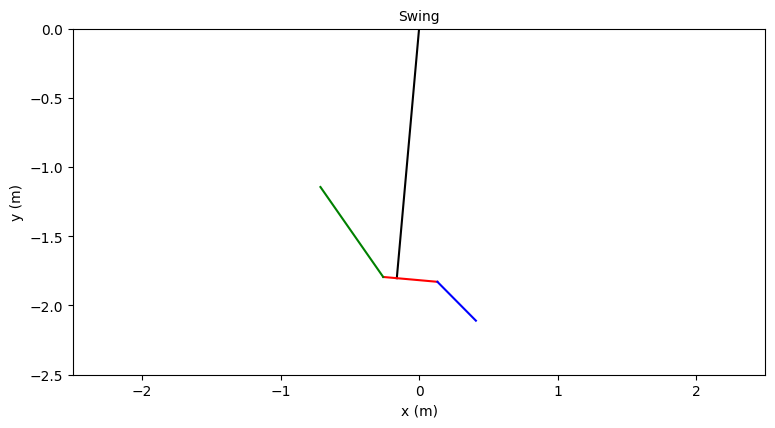

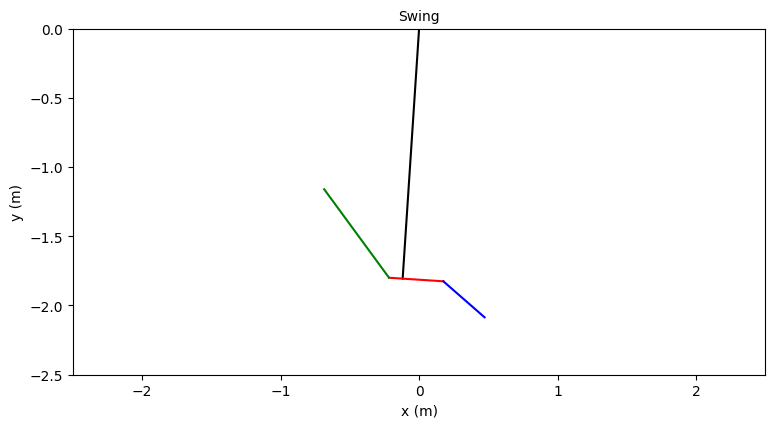

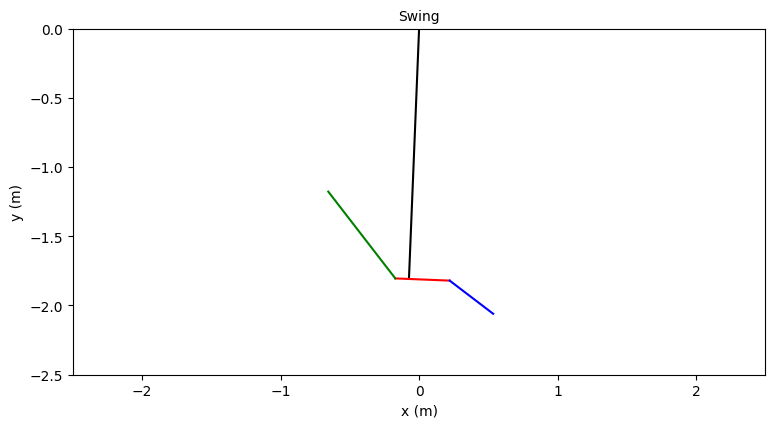

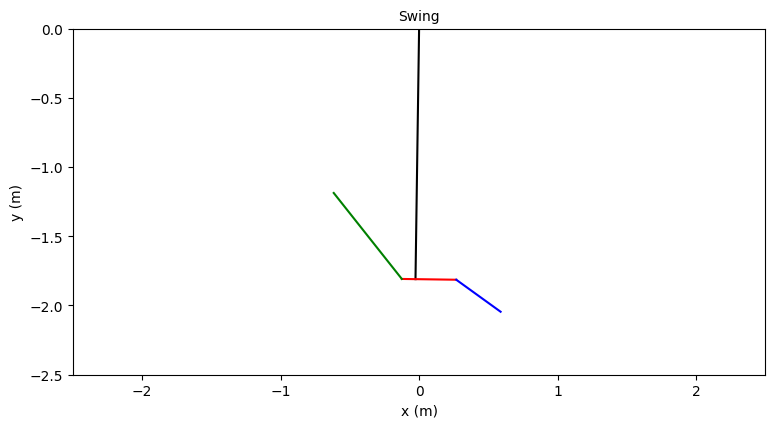

NameError: name 'pd' is not defined

In [2]:
data = []

env = TimeLimit(PlaygroundSwingEnv(render_mode='human'), max_episode_steps=100)
obs, info = env.reset()
for _ in range(10):
    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)
    data.append({'theta': obs[0],'theta_dot': obs[1],'phi': obs[2],'phi_d': obs[3],'psi': obs[4],'psi_d': obs[5]})
    if not env.observation_space.contains(obs): 
        print(f'State outside of the observation space. {obs}')
        # break
        
df = pd.DataFrame(data)

301


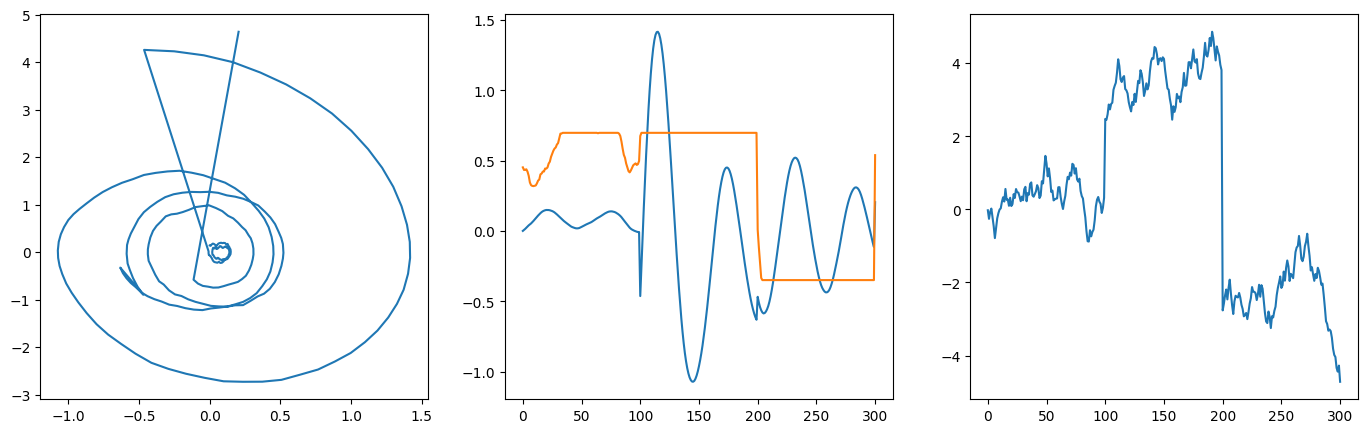

In [ ]:
# Create your custom environment
env = PlaygroundSwingEnv()

# Wrap it with a time limit of steps per episode
env = TimeLimit(env, max_episode_steps=100)
data = []
obs, info = env.reset()
for _ in range(301):
    data.append({'theta': obs[0],'theta_dot': obs[1],'phi': obs[2],'phi_d': obs[3],'psi': obs[4],'psi_d': obs[5]})
    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)
    if terminated or truncated:
        obs, info = env.reset()
env.close()
df = pd.DataFrame(data)
print(len(df))

f, ax = plt.subplots(1,3, figsize=(17,5))
ax[0].plot(df['theta'], df['theta_dot'])
ax[1].plot(df.index, df['theta'])
ax[1].plot(df.index, df['phi'])
ax[2].plot(df.index, df['phi_d'])

In [ ]:
from stable_baselines3 import PPO

model = PPO("MlpPolicy", env, verbose=1)

In [ ]:
model.learn(total_timesteps=200_000)  # Adjust as needed
# model.save("ppo_playground_swing")

---------------------------------
| rollout/           |          |
|    ep_len_mean     | 450      |
|    ep_rew_mean     | 199      |
| time/              |          |
|    fps             | 686      |
|    iterations      | 1        |
|    time_elapsed    | 2        |
|    total_timesteps | 2048     |
---------------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 450         |
|    ep_rew_mean          | 193         |
| time/                   |             |
|    fps                  | 476         |
|    iterations           | 2           |
|    time_elapsed         | 8           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.005477974 |
|    clip_fraction        | 0.0228      |
|    clip_range           | 0.2         |
|    entropy_loss         | -2.83       |
|    explained_variance   | -0.00355    |
|    learning_rate        | 0.

In [ ]:
obs, info = env.reset()
total_reward = 0
done = False
data = []
t = 0
while not done:
    action, _ = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, info = env.step(action)
    total_reward += reward
    done = terminated or truncated
    data.append({'t': t, 'theta': obs[0], 'theta_dot': obs[1], 'phi': obs[2], 'psi': obs[4], 'phi_dot': obs[3]})
    t+=1/25
df = pd.DataFrame(data)
print(len(df))
print("Total reward:", total_reward)

fig, ax = plt.subplots(1,3, figsize = (17, 5))
ax[0].plot(df['theta'], df['theta_dot'])
ax[0].set_title('phase')
ax[1].plot(df['t'], df['theta'])
ax[1].plot(df.index, df['phi'])
ax[1].set_title('swing/torso position')
ax[2].plot(df.index, df['phi_dot'])
ax[2].set_title('toros speed')

NameError: name 'model' is not defined

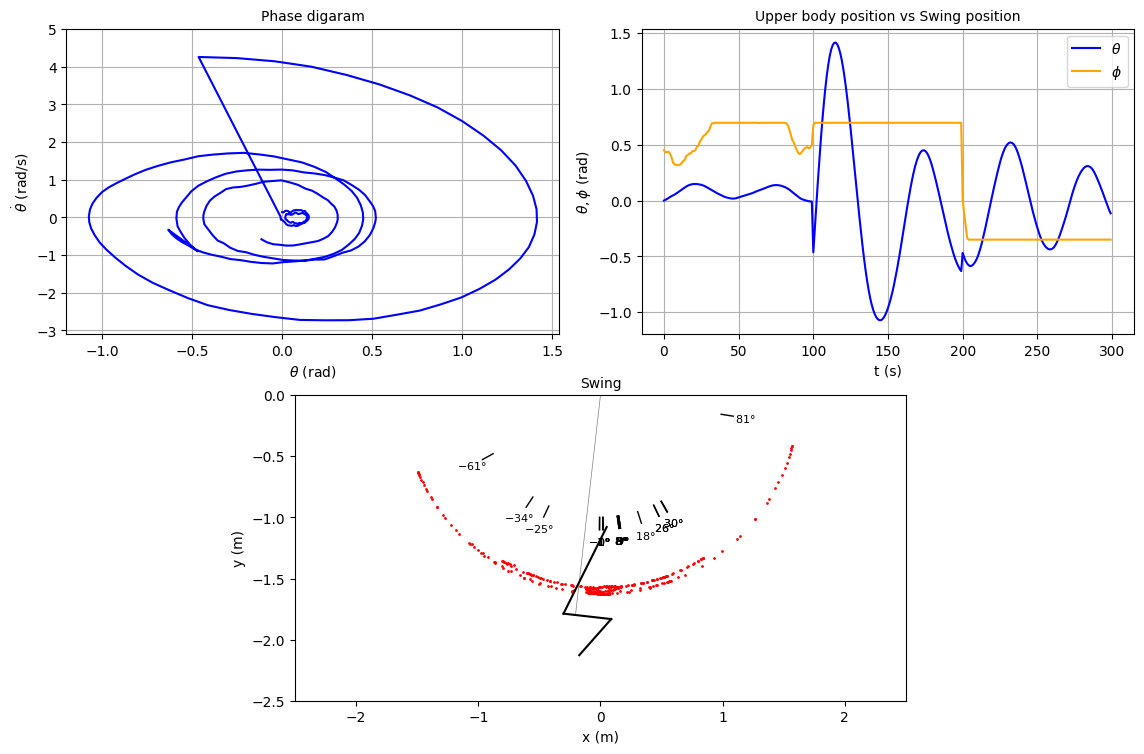

In [ ]:
import os
import sys
import argparse

from math import sin, cos, sqrt, pi
import scipy as sp
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

def plot_theta(ax_, theta_):
      # drawing theta on plot with its value in degrees
      ax_.plot([1*sin(theta_),1.1*sin(theta_)], [-1*cos(theta_),-1.1*cos(theta_)], color='black', linewidth=1)
      ax_.text(1.2*sin(theta_), -1.2*cos(theta_), f'${np.degrees(theta_):.0f}\\degree$', fontsize=8, horizontalalignment="center", verticalalignment="center")
      
def plot_positions(ax_, theta_, phi_, psi_):
      # position of the butt
      p1 = np.array((L*sin(theta_) - a*cos(theta_), -L*cos(theta_) - a*sin(theta_)))
      # position of knees
      p2 = np.array((L*sin(theta_) + b*cos(theta_), -L*cos(theta_) + b*sin(theta_)))
      # position of head
      p3 = p1 + l1*np.array((-sin(theta_+phi_), cos(theta_+phi_)))
      # position of feet
      p4 = p2 + l3*np.array((sin(theta_+psi_), -cos(theta_+psi_)))
        
      swing_lines = []
      swing_lines.append(ax_.plot([0, L*sin(theta_)], [0, -L*cos(theta_)], color='grey', linewidth=0.5)[0])
      swing_lines.append(ax_.plot([p1[0], p2[0]], [p1[1], p2[1]], color='black', linewidth=1.5)[0])
      swing_lines.append(ax_.plot([p1[0], p3[0]], [p1[1], p3[1]], color='black', linewidth=1.5)[0])
      swing_lines.append(ax_.plot([p2[0], p4[0]], [p2[1], p4[1]], color='black', linewidth=1.5)[0])
    
      # center of the mass
      mc1 = (p1+p3)/2
      mc2 = (p1+p2)/2
      mc3 = (p2+p4)/2
      CM = (m1*mc1 + m2*mc2 + m3*mc3 + M0*np.array((L/2*sin(theta_), -L/2*cos(theta_))))/(M+M0)
      red_dot = ax_.plot([CM[0]], [CM[1]], marker='o', markersize=1, color='red')[0]

      return swing_lines, red_dot

g = 9.8
t_step = 1/25

# drag coefficient
k = 0.4
k_prime = 7/3

# length and mass of swing
# L = 1.61
L = 1.81
# L = 2.01
M0 = 2 # base on google answer

# mass of swinger
m1 = 31.3
m2 = 12.3
m3 = 6.4
M = m1 + m2 + m3
# height of swinger
l1 = 0.792
l2 = 0.393
l3 = 0.395
# position of swinger on sit
a = (m2/2 + m3)*l2/M
b = (m1 + m2/2)*l2/M

# range of torso position
phi_mean = np.radians(10)
phi0 = np.radians(30)
# range of legs position (disregarded in paper because of significantly smaller than that of the upper body)
psi_mean = np.radians(10)
psi0 = np.radians(45)

# Moments of inertia
I = (M0/3 + M) * L**2
I_prime = (m1*l1**2 + m2*l2**2 + m3*l3**2)/3 + (m1*m3 - m2**2/4)*l2**2/M

N = (M0/2 + M)*L

if True:
      fig = plt.figure(figsize=(12, 8))
      ax = plt.subplot2grid((4, 4), (2, 0), rowspan=2, colspan=4)
      ax.set_aspect('equal')
      ax.set_xlim([-2.5,2.5])
      ax.set_ylim([-2.5,0])
      ax.set_xlabel('x (m)')
      ax.set_ylabel('y (m)')
      ax.set_title('Swing', fontsize='medium')
      fig.tight_layout()

      # phase diagram
      ax1 = plt.subplot2grid((4, 4), (0, 0), rowspan=2, colspan=2)
      ax1.set_title('Phase digaram', fontsize='medium')
      ax1.set_xlabel(r'$\theta$ (rad)')
      ax1.set_ylabel(r'$\dot \theta$ (rad/s)')
      ax1.grid()

      phase_curve, = ax1.plot(df['theta'], df['theta_dot'], 'b')

      # angle plot
      ax2 = plt.subplot2grid((4, 4), (0, 2), rowspan=2, colspan=2)
      ax2.set_title('Upper body position vs Swing position', fontsize='medium')
      ax2.set_xlabel('t (s)')
      ax2.set_ylabel(r'$\theta, \phi$ (rad)')
      ax2.grid()

      theta_curve, = ax2.plot(df.index, df['theta'], 'blue', label=r'$\theta$')
      phi_curve, =  ax2.plot(df.index, df['phi'], 'orange', label=r'$\phi$')

      plt.subplots_adjust(left=0.08, right=0.97, top=0.92, bottom=0.08, wspace=0.4, hspace=0.5)

      swing_lines  = [None]
      red_dot = [None]

      def animate(i):
          # Remove old swing lines, but not the red dot
          if swing_lines[0] is not None:
              for line in swing_lines[0]:
                  line.remove()
          # Clear plot after cycle
          if df['theta_dot'][i] == 0 and i>0:
              ax.clear()
              ax.set_aspect('equal')
              ax.set_xlim([-2.5,2.5])
              ax.set_ylim([-2.5,0])
              ax.set_xlabel('x (m)')
              ax.set_ylabel('y (m)')
              ax.set_title('Swing', fontsize='medium')

          if round(df['theta_dot'][i],1) == 0 or (df['theta_dot'][i]>0 and df['theta_dot'][i+1]<0):
                plot_theta(ax, df['theta'][i])
      
          phase_curve.set_data(df['theta'][:i+1], df['theta_dot'][:i+1])
      
          theta_curve.set_data(df.index[:i+1], df['theta'][:i+1])
          phi_curve.set_data(df.index[:i+1], df['phi'][:i+1])
          ax2.legend()
      
          swing_lines[0], red_dot[0]  = plot_positions(ax, df['theta'][i], df['phi'][i], df['psi'][i])
          return swing_lines[0] + [red_dot[0]]

      ani = FuncAnimation(fig, animate, frames=len(df)-1, interval=1000*t_step, blit=True)
      # Save as GIF using PillowWriter
      ani.save(f'agent105_t{t_step:.1g}.gif', writer=PillowWriter(fps=1/t_step))
